# K Means Clustering

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [15]:
# Training Data
df = pd.read_csv("TSLA-Data.csv", header=0, na_values='?')
df = df.dropna()
# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price), Volume is being discarded for SVM
X = np.array(df[['Open', 'High', 'Low']])
# Add days since public column
days = np.arange(X.shape[0]).reshape(X.shape[0], 1)
y = np.array(df['Close'])
x = np.hstack((days, X))
print(x)

[[0.0000000e+00 3.8000000e+00 5.0000000e+00 3.5080000e+00]
 [1.0000000e+00 5.1580000e+00 6.0840000e+00 4.6600000e+00]
 [2.0000000e+00 5.0000000e+00 5.1840000e+00 4.0540000e+00]
 ...
 [2.1390000e+03 6.3967999e+01 6.4433998e+01 6.0299999e+01]
 [2.1400000e+03 6.4620003e+01 6.7248001e+01 6.3681999e+01]
 [2.1410000e+03 6.7557999e+01 6.7842003e+01 6.5052002e+01]]


,Date,Open,High,Low,Close,Adj Close,Volume
2137,2018-12-24,62.700001,62.900002,59.040001,59.077999,59.077999,27799500
2138,2018-12-26,60.000000,65.393997,58.818001,65.218002,65.218002,40815500
2139,2018-12-27,63.967999,64.433998,60.299999,63.226002,63.226002,42875500
2140,2018-12-28,64.620003,67.248001,63.681999,66.774002,66.774002,49695000
2141,2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500


In [14]:
# Validation Data (Validation Set using 2019 data)
df2 = pd.read_csv("TSLA-2019.csv", header=0, na_values='?')
df2 = df2.dropna()

# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price, Volume)
X2 = np.array(df2[['Open', 'High', 'Low']])
# Add days since public column
days = np.arange(X.shape[0] + 1, X.shape[0] + X2.shape[0] + 1).reshape(X2.shape[0], 1)
x2 = np.hstack((days, X2))
y2 = np.array(df2['Close'])
x = np.vstack((x, x2))
y = y.reshape(y.shape[0], 1)
y2 = y2.reshape(y2.shape[0], 1)
y = np.vstack((y, y2))
y = y.reshape(y.shape[0], )

,Date,Open,High,Low,Close,Adj Close,Volume
247,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
248,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
249,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
250,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000
251,2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500


In [4]:
clustering = KMeans(n_clusters = 4, random_state = 8)
clustering.fit(x)
#clustering.labels_

KMeans(n_clusters=4, random_state=8)

Text(0.5, 1.0, 'K-Means Clusters on Tesla Stock (TSLA)')

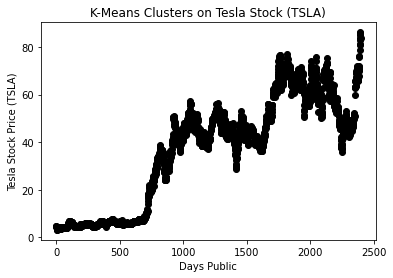

In [13]:
plt.scatter(x[:, 0], y, c = 'black')
plt.ylabel("Tesla Stock Price (TSLA)")
plt.xlabel("Days Public")
plt.title("K-Means Clusters on Tesla Stock (TSLA)")

Text(0.5, 1.0, 'K-Means Clusters on Tesla Stock (TSLA)')

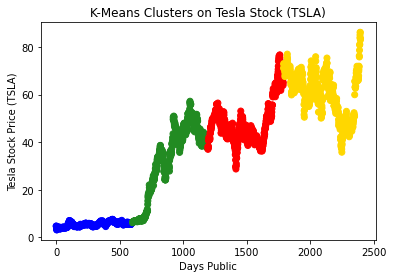

In [7]:
color_theme = ['red', 'blue', 'gold', 'forestgreen']
colors = []
for c in clustering.labels_:
    colors.append(color_theme[c])
#Plot the clusters
plt.scatter(x[:, 0], y, c = colors)
#Plot the centroids
#plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, -1], s = 85, c = "black")
plt.ylabel("Tesla Stock Price (TSLA)")
plt.xlabel("Days Public")
#Create and plot the trendline
z = np.polyfit(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, -1], 1)
p = np.poly1d(z)
#plt.plot(x[:, 0], p(x[:, 0]), linewidth = 3, c = "gray")
plt.title("K-Means Clusters on Tesla Stock (TSLA)")